In [22]:
import mysql.connector as sql
import pandas as pd
import datetime as dt
import numpy as np
from sorted_months_weekdays import *
from sort_dataframeby_monthorweek import *
import matplotlib.pyplot as plt
import math
import requests
import json
from pandas.io.json import json_normalize
import matplotlib.dates as mdates
from datetime import date, timedelta

In [23]:
db_connection = sql.connect(host='localhost', database='collection_users', user='pandas', password='password')

sbBundles = pd.read_sql('SELECT * FROM UsersShoeboxBundles', con=db_connection)
sbBundles['created'] = pd.to_datetime(sbBundles['created'], unit='s')
sbBundles['lastmodified'] = pd.to_datetime(sbBundles['lastmodified'], unit='s')
sbBundles['deleted'].replace(0, np.nan, inplace=True)
sbBundles['deleted'] = pd.to_datetime(sbBundles['deleted'], unit='s')
sbBundles['description'].replace(r'^\s*$', np.NaN, regex=True, inplace=True)

In [24]:
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 50)

In [28]:
sbBundles

,id,user_id,type_id,title,description,is_public,created,lastmodified,deleted,count_items,count_items_public,exported
0,789383,199,1,"Your visit to the museum on September 30, 2014",NaN,0,2014-09-30 17:24:19,2015-04-01 22:02:20,NaT,3,0,0
1,789967,231,1,"Your visit to the museum on October 2, 2014",NaN,0,2014-10-02 19:59:12,2015-04-01 22:02:20,NaT,5,0,0
2,790365,247,1,"Your visit to the museum on October 6, 2014",NaN,0,2014-10-06 19:34:33,2015-04-01 22:02:20,2015-01-31 04:17:29,0,0,0
3,790917,247,1,"Your visit to the museum on October 7, 2014",NaN,0,2014-10-07 21:38:07,2015-04-01 22:02:20,2015-01-31 04:17:31,0,0,0
4,796435,247,1,"Your visit to the museum on November 3, 2014",NaN,0,2014-11-03 21:32:25,2015-04-01 22:02:20,2015-01-31 04:17:27,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
23121,132498395,28814,1,"Your visit to the museum on April 22, 2020",NaN,0,2020-04-22 20:58:47,2020-04-28 05:52:34,NaT,3,0,0
23122,132498415,28814,1,"Your visit to the museum on April 22, 2020",NaN,0,2020-04-22 22:01:58,2020-04-23 01:06:41,NaT,4,0,0
23123,132777659,28814,1,"Your visit to the museum on July 2, 2020",NaN,1,2020-07-02 17:21:25,2020-07-02 17:21:51,NaT,1,1,0
23124,132777661,28814,1,"Your visit to the museum on December 31, 1969",NaN,1,2020-07-22 20:26:22,2020-07-22 20:54:50,NaT,5,4,0


In [25]:
sbBundles[sbBundles['id'] == 0]
#to join with sbitems engagment? - what bundles were checked afterward? 

,id,user_id,type_id,title,description,is_public,created,lastmodified,deleted,count_items,count_items_public,exported


In [27]:
sbBundles['user_id'].value_counts().count()
#21,060 accounts opened. 

21060

# deleted 

In [14]:
sbBundles['deleted'].dropna().count()
#57 account were deleted

57

# count_items


In [17]:
sbBundles['count_items'].sum()

1427344

In [20]:
sbBundles.sort_values(by='count_items', ascending=False)
#the one that collected the most 

,id,user_id,type_id,title,description,is_public,created,lastmodified,deleted,count_items,count_items_public,exported
24,1586155,247,1,"Your visit to the museum on February 25, 2015",NaN,0,2015-02-25 15:44:10,2020-06-22 18:29:19,NaT,2534,0,0
11149,97539579,12120,1,"Your visit to the museum on December 31, 1969",NaN,0,2016-04-18 03:05:34,2016-04-18 03:06:30,NaT,806,0,0
12567,100848813,13431,1,"Your visit to the museum on December 31, 1969",NaN,0,2016-05-27 13:42:45,2016-05-27 13:43:38,NaT,800,0,0
14284,106843593,15250,1,"Your visit to the museum on August 9, 2016",NaN,0,2016-08-11 01:41:41,2016-08-11 01:42:29,NaT,745,0,0
16966,114159351,19214,1,"Your visit to the museum on April 22, 2017",NaN,0,2017-04-28 22:37:13,2017-04-28 22:38:02,NaT,741,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
8043,92088145,8575,1,"Your visit to the museum on January 3, 2016",NaN,0,2016-01-04 15:56:48,2016-01-04 15:56:48,NaT,0,0,0
7943,91984591,8446,1,"Your visit to the museum on January 2, 2016",NaN,0,2016-01-02 21:33:45,2016-01-02 21:33:45,NaT,0,0,0
20236,123538545,25403,1,"Your visit to the museum on December 31, 1969",NaN,0,2018-05-31 15:44:52,2018-05-31 15:44:52,NaT,0,0,0
20241,123545865,25411,1,"Your visit to the museum on December 31, 1969",NaN,0,2018-06-01 14:09:25,2018-06-01 14:09:25,NaT,0,0,0


In [35]:
# sbBundles_by_month = sbBundles['created'].groupby(sbBundles.created.dt.to_period("M")).agg('count')
# sbBundles_by_month.nlargest(10)

sbBundles_by_date = sbBundles[['count_items', 'created']]
per_month = sbBundles_by_date.created.dt.to_period("M")
month_count = sbBundles_by_date.groupby(per_month).sum()

month_count.sort_values(by='count_items', ascending=False)

,count_items
created,
2016-03,107743
2016-04,99232
2016-05,88209
2016-06,73976
2016-07,71504
2016-02,68331
2015-10,55599
2015-08,53758
2016-08,49057


In [52]:
month_count = month_count.rename({'count_items':'sb_count_items'}, axis=1)

<Figure size 576x360 with 0 Axes>

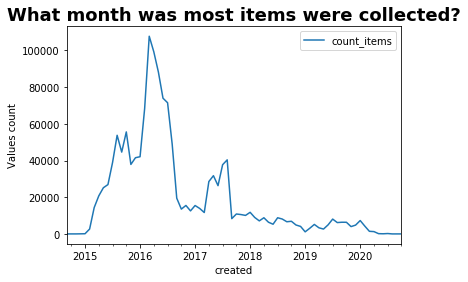

In [37]:
plt.figure(figsize=(8,5))
month_count.plot()
plt.title('What month was most items were collected?', fontdict={'fontweight': 'bold', 'fontsize':18})
plt.ylabel('Values count')
plt.legend()
# plt.savefig('monthly_sb_collect_items.png', dpi=300)
#count items per months

In [38]:
db_connection = sql.connect(host='localhost', database='collection_visits', user='pandas', password='password')

pensActivity = pd.read_sql('SELECT * FROM PensActivity', con=db_connection)
pensActivity['created'] = pd.to_datetime(pensActivity['created'], unit='s')
pensActivity['lastmodified'] = pd.to_datetime(pensActivity['lastmodified'], unit='s')
pensActivity['created'].replace(0, np.nan, inplace=True)
pensActivity['lastmodified'].replace(0, np.nan, inplace=True)
pensActivity['notes'].replace(r'^\s*$', np.NaN, regex=True, inplace=True)
pensActivity['notes'] = pensActivity['notes'].astype('category')
pensActivity.sort_values(by='created', inplace=True)

In [40]:
activity_by_date = pensActivity[['count_items', 'created']]
month_activity = activity_by_date.created.dt.to_period("M")
activity_count = activity_by_date.groupby(month_activity).sum()
activity_count
activity_count.sort_values(by='count_items', ascending=False)

,count_items
created,
2016-07,1361480
2016-08,1031058
2016-04,1021788
2016-03,899925
2016-05,884831
2016-06,869440
2017-07,676058
2016-02,672330
2017-08,630360


In [50]:
activity_count = activity_count.rename({'count_items': 'activity_count_items'}, axis=1)

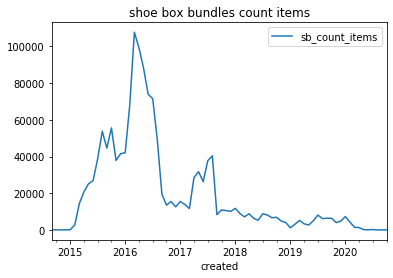

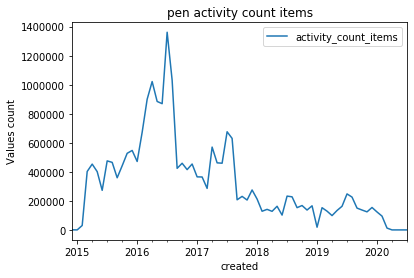

In [59]:
month_count.plot(title='shoe box bundles count items')
activity_count.plot(title='pen activity count items')
plt.ylabel('Values count')
plt.legend()
# plt.savefig('monthly_sb_activity_collect_items.png', dpi=300)
#count items per months- in shoebox bundle vs. pen activity. 
#same pattern! but **the numbers not making lots of sense to me**
#why bundle isn't including all the items? 

# How many items per user

In [6]:
items_per_user = sbBundles[['user_id', 'count_items']]

In [16]:
items_per_user = items_per_user.groupby(['user_id']).sum()
items_per_user

,count_items
user_id,
3,106
18,88
25,18
94,155
105,32
...,...
30935,29
30957,16
30959,1


In [17]:
items_per_user['count_items'].mean()
#in average 67.7 items per user

67.77511870845204

In [19]:
items_per_user['count_items'].nlargest(10)
#i wonder about these high number... does it make sense that these users collected so much. 

user_id
247      2742
6150     1162
3368     1106
13996    1084
5803     1053
12120     806
13431     800
10866     797
11040     789
14720     779
Name: count_items, dtype: int64

In [21]:
items_per_user.describe()

,count_items
count,21060.000000
mean,67.775119
std,78.429417
min,0.000000
25%,22.000000
50%,43.000000
75%,87.000000
max,2742.000000
